In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline

# Задание 1

In [5]:
data = pd.read_excel('db.xlsx')
data.head()

,No,Rooms,DistMetro,Area,Price
0,1,3,12,56,9396
1,2,2,4,54,9785
2,3,1,2,31,5783
3,4,2,8,48,9123
4,5,1,11,31,5662


In [30]:
data.size

25000

In [9]:
data.describe()

,No,Rooms,DistMetro,Area,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,1.999200,9.588000,47.558800,8550.912200
std,1443.520003,0.813715,5.795151,17.167431,2985.530681
min,1.000000,1.000000,0.000000,21.000000,2825.000000
25%,1250.750000,1.000000,5.000000,31.000000,5904.750000
50%,2500.500000,2.000000,10.000000,48.000000,8407.500000
75%,3750.250000,3.000000,15.000000,59.000000,10652.000000
max,5000.000000,3.000000,19.000000,83.000000,17614.000000


In [7]:
data.mode().head(1)

,No,Rooms,DistMetro,Area,Price
0,1,2.0,16.0,29.0,5432.0


In [15]:
price = data['Price']

Text(0.5, 0, 'Цена на квартиры')

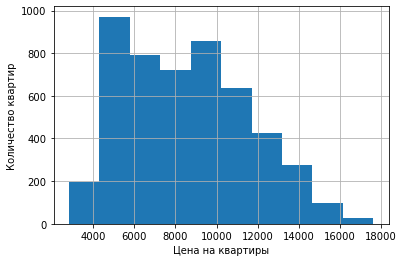

In [16]:
y = price.hist()
y.set_ylabel('Количество квартир')
y.set_xlabel('Цена на квартиры')

С помощью методов относительногй статистики определено (для всех параметров): 
+ размер БД
+ максимальное значение 
+ минимальное значение 
+ мода
+ стандартнное отклонение
+ медиана
+ среднее значение 
+ квартили

По графику можно предположить, что значения в этой БД распределены по Гамма-закону (https://habrastorage.org/getpro/habr/post_images/4f6/5f4/edb/4f65f4edb921715dbb56a320a65b101e.png)

In [12]:
data["Rooms"].unique() #узнать скльки-клмнатные квартиры есть в БД

array([3, 2, 1], dtype=int64)

In [ ]:
room1 = price[data['Rooms'] == 1]
room2 = price[data['Rooms'] == 2]
room3 = price[data['Rooms'] == 3]

Text(0.5, 0, 'Цена на 1-комнатные квартиры')

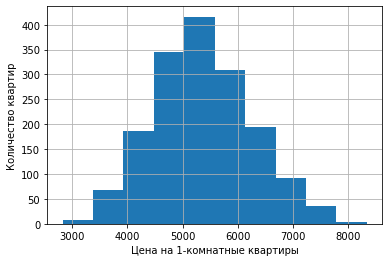

In [25]:
y = room1.hist()
y.set_ylabel('Количество квартир')
y.set_xlabel('Цена на 1-комнатные квартиры')

Text(0.5, 0, 'Цена на 2-комнатные квартиры')

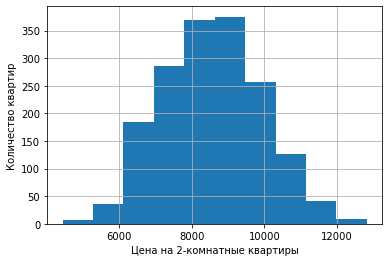

In [26]:
y = room2.hist()
y.set_ylabel('Количество квартир')
y.set_xlabel('Цена на 2-комнатные квартиры')

Text(0.5, 0, 'Цена на 3-комнатные квартиры')

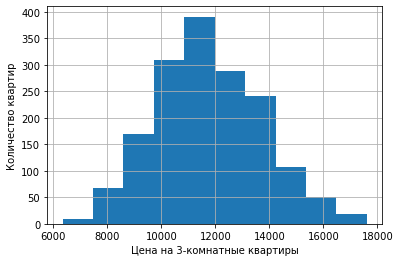

In [27]:
y = room3.hist()
y.set_ylabel('Количество квартир')
y.set_xlabel('Цена на 3-комнатные квартиры')

По построенным граикам можно предположить, что если рассматривать квартиры с одинаковым колиесвтом комнат, то их распределение почтиняется нормальному закону

# Задание 2

In [37]:
room1 = data[data['Rooms'] == 1]
room2 = data[data['Rooms'] == 2]
room3 = data[data['Rooms'] == 3]

In [39]:
room1[['Price', 'Area']].cov()

,Price,Area
Price,780506.330905,1989.519167
Area,1989.519167,11.899206


In [43]:
corr1=1989.519167/(statistics.pstdev(room1['Price'])*statistics.pstdev(room1['Area']))
print(corr1)
print(corr1 * 100)

0.6532254508775661
65.32254508775661


In [42]:
room1[['Price', 'Area']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Price,Area
Price,1.00,0.65
Area,0.65,1.00


Коэффициент Пирона = 0,65 (65 %)

In [45]:
room2[['Price', 'Area']].cov()

,Price,Area
Price,1.875752e+06,5793.161991
Area,5.793162e+03,35.914814


In [46]:
corr2=1989.519167/(statistics.pstdev(room2['Price'])*statistics.pstdev(room2['Area']))
print(corr2)
print(corr2 * 100)

0.2425385157548405
24.25385157548405


In [47]:
room2[['Price', 'Area']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Price,Area
Price,1.00,0.71
Area,0.71,1.00


Коэффициент Пирона = 0,71 (71 %)

In [48]:
room3[['Price', 'Area']].cov()

,Price,Area
Price,3.840079e+06,13052.97479
Area,1.305297e+04,79.99979


In [49]:
corr3=1989.519167/(statistics.pstdev(room3['Price'])*statistics.pstdev(room3['Area']))
print(corr3)
print(corr3 * 100)

0.11357858414438239
11.357858414438239


In [50]:
room3[['Price', 'Area']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Price,Area
Price,1.00,0.74
Area,0.74,1.00


Коэффициент Пирона = 0,74 (74 %)

Проведеннные действия для получения корреляция показывают существует ли связь между площадью квартиры и его цены (рассматривая при этом каждую категорию отдельно). Проанализировав полученные данные, можно сделать вывод, что такая связь существует, так как везде коэффициент корреляции > 0 => с увеличением площади квартиры, увеличивается и ее цена.

# Задание 3

In [51]:
room240 = room2[room2['Area'] > 40]
room240.quantile([0.1, 0.25, 0.5, 0.75], axis = 0) 
print('Квантиль 10 %: ', np.quantile(room240['Price'], 0.1))
print('Квантиль 25 %: ', np.quantile(room240['Price'], 0.25))
print('Квантиль 50 %: ', np.quantile(room240['Price'], 0.5))
print('Квантиль 75 %: ', np.quantile(room240['Price'], 0.75))

Квантиль 10 %:  7146.0
Квантиль 25 %:  7924.0
Квантиль 50 %:  8812.0
Квантиль 75 %:  9684.5


# Задание 4

In [82]:
room3 = price[data['Rooms'] == 3]

N = room3.count()
print('Количество: ', N)
print('Средняя цена: ', round(room3.mean(), 3))

pr = round(9200/0.03, 3)
print('Для получения прибыли нужно продать квартир на сумму: ', pr, ' (тыс. руб.)')
print('Для получения прибыли с 1 сделики нужно получить сумму: ', pr/25, ' (тыс. руб.)')

count = room3[data['Price'] >= 12266].count()
print('Количество квартир стоимсотью 12200-12500 тыс. руб.  ', count)

V = round(count / N, 3)
print('Вероятность: ', V, ' или ', V*100, '%')

Количество:  1653
Средняя цена:  11749.978
Для получения прибыли нужно продать квартир на сумму:  306666.667  (тыс. руб.)
Для получения прибыли с 1 сделики нужно получить сумму:  12266.66668  (тыс. руб.)
Количество квартир стоимсотью 12200-12500 тыс. руб.   616
Вероятность:  0.373  или  37.3 %


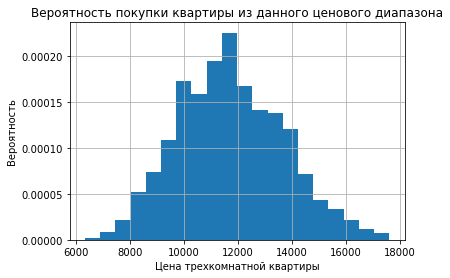

In [55]:
count, bins, ignored=plt.hist(room3, 20, density=True)
plt.title('Вероятность покупки квартиры')
plt.ylabel('Вероятность')
plt.xlabel('Цена трехкомнатной квартиры')
plt.grid(True)
plt.show()

Судя по графикку, можно предположит, что распределние нормальное